In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [27]:
# VCF9999 Weight: post-election weight full sample
# VCF0013 Completion - Post-election (flag)
# VCF0901b State Postal Abbrev
# VCF9240 CSES: Left-right (11pt) scale placement for R
# VCF9241: Democrat Party
# VCF9242: Republican Party
# VCF0004 YEAR OF STUDY
# VCF0009z: Weight Full Sample
# VCF0900: Congressional District

In [33]:
gdf = gpd.read_file(f"geo_shapes/composite_us_states.geojson")
gdf = gdf.rename(columns={"name": "state", "iso_3166_2": "state_code"})
gdf["state"] = gdf["state"].str.upper()
gdf.head()

df_location = pd.read_csv("https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_fips_master.csv")
df_location = df_location.rename(columns={"state": "state_code", "state_name": "state"})
df_location.head()

,state,state_abbr,long_name,fips,sumlev,region,division,state_code,region_name,division_name
0,Alabama,AL,Alabama AL,1,40,3,6,1,South,East South Central
1,Alaska,AK,Alaska AK,2,40,4,9,2,West,Pacific
2,Arizona,AZ,Arizona AZ,4,40,4,8,4,West,Mountain
3,Arkansas,AR,Arkansas AR,5,40,3,7,5,South,West South Central
4,California,CA,California CA,6,40,4,9,6,West,Pacific


In [40]:
# VCF0302 Party identification of responder

In [10]:
df = pd.read_csv("data_external/United States/anes_timeseries_cdf_csv_20220916.csv")
df["VCF9240"] = df["VCF9240"].replace(" ", np.nan).astype(float)
df.head()

C:\Users\cnava\AppData\Local\Temp\ipykernel_5548\2362112219.py:1: DtypeWarning: Columns (4,5,6,7,8,9,13,14,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,38,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,233,254,275,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,361,382,403,424,42

,Version,VCF0004,VCF0006,VCF0006a,VCF0009x,VCF0010x,VCF0011x,VCF0009y,VCF0010y,VCF0011y,...,VCF9272,VCF9273,VCF9274,VCF9275,VCF9277,VCF9278,VCF9279,VCF9280,VCF9281,VCF9282
0,ANES_CDF_VERSION:2022-Sep-16,1948,1001,19481001,1,1,1,1,1,1,...,,,,,,,,,,
1,ANES_CDF_VERSION:2022-Sep-16,1948,1002,19481002,1,1,1,1,1,1,...,,,,,,,,,,
2,ANES_CDF_VERSION:2022-Sep-16,1948,1003,19481003,1,1,1,1,1,1,...,,,,,,,,,,
3,ANES_CDF_VERSION:2022-Sep-16,1948,1004,19481004,1,1,1,1,1,1,...,,,,,,,,,,
4,ANES_CDF_VERSION:2022-Sep-16,1948,1005,19481005,1,1,1,1,1,1,...,,,,,,,,,,


In [26]:
df["VCF0900"].unique()

array([' ', '30', '12', '36', '16', '1', '4', '25', '28', '13', '18', '6',
       '5', '7', '11', '2', '29', '3', '9', '17', '31', '24', '19', '35',
       '14', '15', '8', '21', '26', '27', '10', '0', 35, 6, 14, 36, 4, 26,
       3, 5, 17, 12, 2, 1, 9, 11, 25, 7, 29, 31, 30, 10, 19, 8, 21, 15,
       28, 18, 20, 13, 22, 16, 24, 23, 39, 0, 27, 99, '22', '23', '37',
       '32', '38', '20', '34', '99', 34, 32, 38, 37, 33, 41, 40, 42, 43,
       44, 45, 46, 48, 47, 50, 51, 49, 52, 53, '45', '47'], dtype=object)

In [93]:
df["POL_ORIENTATION"] = df["VCF9240"].apply(lambda x: "LEFT" if x in range(0, 5) else "RIGHT" if x in range (6, 11) else np.nan)

In [41]:
for ii, item in df[df["VCF9240"].isin(range(0, 10 + 1))].groupby(["VCF0004", "VCF0901b", "POL_ORIENTATION"]):
    print(ii)

    ### affective polarization

(1996, 'AL', 'LEFT')
(1996, 'AL', 'RIGHT')
(1996, 'AR', 'LEFT')
(1996, 'AR', 'RIGHT')
(1996, 'AZ', 'LEFT')
(1996, 'AZ', 'RIGHT')
(1996, 'CA', 'LEFT')
(1996, 'CA', 'RIGHT')
(1996, 'CO', 'LEFT')
(1996, 'CO', 'RIGHT')
(1996, 'CT', 'LEFT')
(1996, 'CT', 'RIGHT')
(1996, 'DC', 'LEFT')
(1996, 'FL', 'LEFT')
(1996, 'FL', 'RIGHT')
(1996, 'GA', 'LEFT')
(1996, 'GA', 'RIGHT')
(1996, 'HI', 'RIGHT')
(1996, 'IA', 'LEFT')
(1996, 'IA', 'RIGHT')
(1996, 'IL', 'LEFT')
(1996, 'IL', 'RIGHT')
(1996, 'IN', 'LEFT')
(1996, 'IN', 'RIGHT')
(1996, 'KS', 'LEFT')
(1996, 'KS', 'RIGHT')
(1996, 'LA', 'LEFT')
(1996, 'LA', 'RIGHT')
(1996, 'MA', 'LEFT')
(1996, 'MA', 'RIGHT')
(1996, 'MD', 'LEFT')
(1996, 'MD', 'RIGHT')
(1996, 'MI', 'LEFT')
(1996, 'MI', 'RIGHT')
(1996, 'MN', 'LEFT')
(1996, 'MN', 'RIGHT')
(1996, 'MO', 'LEFT')
(1996, 'MO', 'RIGHT')
(1996, 'MS', 'RIGHT')
(1996, 'NC', 'LEFT')
(1996, 'NC', 'RIGHT')
(1996, 'NE', 'LEFT')
(1996, 'NE', 'RIGHT')
(1996, 'NH', 'LEFT')
(1996, 'NH', 'RIGHT')
(1996, 'NJ', 'LEFT')
(1996, 'NJ'

In [40]:
dd = df[df["VCF9240"].isin(range(0, 10 + 1))].groupby(["VCF0004", "VCF0901b", "POL_ORIENTATION"]).agg({"VCF9240": "mean"}).reset_index()\
    .pivot(index=["VCF0004", "VCF0901b"], columns=["POL_ORIENTATION"], values="VCF9240").reset_index()

dd = dd.rename(columns={
    "VCF0004": "year",
    "VCF0901b": "state_abbr"
})

dd["polarization"] = np.absolute(dd["LEFT"] - dd["RIGHT"])
dd = pd.merge(dd, df_location[["state", "state_abbr"]], on="state_abbr")
dd["state"] = dd["state"].str.upper()

dd = dd[["polarization", "year", "state"]]

dd.to_csv("data_output/United States/Polarization_ANES.csv", index=False)

dd.head()

,polarization,year,state
0,4.060606,1996,ALABAMA
1,5.217391,2004,ALABAMA
2,2.578947,2008,ALABAMA
3,4.700130,2012,ALABAMA
4,6.000000,2016,ALABAMA


In [42]:
# VCF0302
# 1. Republican
# 2. Independent
# 3. No preference; none; neither
# 4. Other
# 5. Democrat

# Weight: VCF0009x/VCF0009y/VCF0009z

In [43]:
# Democrat: VCF9241
# Republican: VCF9242

In [43]:
df_filtered = df[["VCF0009z", "VCF0901a", "VCF0004", "VCF9241", "VCF9242", "VCF0302", "VCF0218", "VCF0224"]]
# VCF0218: The Democratic Party – feeling thermometer
# VCF0224: The Republican Party – feeling thermometer
df_filtered = df_filtered[(df_filtered["VCF0218"] != " ") | (df_filtered["VCF0224"] != " ")]
# dd["VCF9999"] = dd["VCF9999"].replace({" ": 1}).astype(float)

df_filtered.head()

,VCF0009z,VCF0901a,VCF0004,VCF9241,VCF9242,VCF0302,VCF0218,VCF0224
21844,1.0,12,1978,,,5,80,50
21845,1.0,19,1978,,,2,50,50
21846,1.0,39,1978,,,1,40,60
21847,1.0,42,1978,,,2,60,60
21848,1.0,42,1978,,,2,85,60


In [45]:
# for idx, tmp in dd.groupby(["VCF0004", "VCF0901b"]):
#     year, state_code = idx
#     dem = tmp[tmp["VCF9241"].isin(list(range(0, 10)))]
#     rep = tmp[tmp["VCF9242"].isin(list(range(1, 11)))]

In [47]:
output = []
for idx, tmp in df_filtered.groupby(["VCF0004", "VCF0901a"]): #
    year, fips = idx

    try:
        print(year, fips)

        df_dem = tmp[(tmp["VCF0218"] != " ") & (tmp["VCF0302"] == 5)]
        in_feeling_dem = df_dem[["VCF0218", "VCF0009z"]].rename(columns={"VCF0218": "value"})

        df_dem = tmp[(tmp["VCF0224"] != " ") & (tmp["VCF0302"] == 5)]
        out_feeling_dem = df_dem[["VCF0224", "VCF0009z"]].rename(columns={"VCF0224": "value"})

        df_rep = tmp[(tmp["VCF0224"] != " ") & (tmp["VCF0302"] == 1)]
        in_feeling_rep = df_rep[["VCF0224", "VCF0009z"]].rename(columns={"VCF0224": "value"})

        df_rep = tmp[(tmp["VCF0218"] != " ") & (tmp["VCF0302"] == 1)]
        out_feeling_rep = df_rep[["VCF0218", "VCF0009z"]].rename(columns={"VCF0218": "value"})

        in_feeling = pd.concat([in_feeling_dem, in_feeling_rep], ignore_index=True)
        in_feeling["value"] = in_feeling["value"].astype(int)
        in_feeling = in_feeling[in_feeling["value"] < 98]
        N_in_feeling = in_feeling.shape[0]

        out_feeling = pd.concat([out_feeling_dem, out_feeling_rep], ignore_index=True)
        out_feeling["value"] = out_feeling["value"].astype(int)
        out_feeling = out_feeling[out_feeling["value"] < 98]
        N_out_feeling = out_feeling.shape[0]

        in_value = np.average(in_feeling["value"].astype(int), weights=in_feeling["VCF0009z"])
        out_value = np.average(out_feeling["value"].astype(int), weights=out_feeling["VCF0009z"])

        output.append({
            "value": in_value,
            "year": year,
            "N": N_in_feeling,
            "type": "In-Feeling",
            "fips": fips
        })

        output.append({
            "value": out_value,
            "year": year,
            "N": N_out_feeling,
            "type": "Out-Feeling",
            # "fips": fips
        })

        output.append({
            "value": in_value - out_value,
            "year": year,
            "N": np.min([N_in_feeling, N_out_feeling]),
            "type": "Affective",
            # "fips": fips
        })

    except:
        pass


1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1978
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1980
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1984
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1986
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988
1988


,state,state_abbr,long_name,fips,sumlev,region,division,state_code,region_name,division_name
0,Alabama,AL,Alabama AL,1,40,3,6,1,South,East South Central
1,Alaska,AK,Alaska AK,2,40,4,9,2,West,Pacific
2,Arizona,AZ,Arizona AZ,4,40,4,8,4,West,Mountain
3,Arkansas,AR,Arkansas AR,5,40,3,7,5,South,West South Central
4,California,CA,California CA,6,40,4,9,6,West,Pacific


In [51]:
df_affective = pd.DataFrame(output)
df_affective = pd.merge(df_affective, df_location[["state", "fips"]], on="fips")
df_affective["state"] = df_affective["state"].str.upper()
df_affective = df_affective.rename(columns={"value": "affective"})
df_affective["affective"] = df_affective["affective"] / 97 

df_affective = df_affective[df_affective["N"] >= 10]
df_affective = df_affective[["affective", "year", "state"]]
df_affective.to_csv("data_output/United States/Affective_Polarization_ANES.csv", index=False)

df_affective

,affective,year,state
0,0.779756,1978,ALABAMA
1,0.802749,1980,ALABAMA
2,0.859107,1982,ALABAMA
3,0.825139,1984,ALABAMA
4,0.803187,1986,ALABAMA
...,...,...,...
611,0.755092,2020,NORTH DAKOTA
616,0.791408,2020,RHODE ISLAND
620,0.718411,2012,MONTANA
622,0.743340,2020,MONTANA


In [49]:
df_affective_states = df_affective[df_affective["N"] >= 30]
df_affective_states = df_affective_states.pivot(index=["state", "year"], columns="type", values="value").reset_index()
df_affective_states

type,state,year,Affective,In-Feeling,Out-Feeling
0,ALABAMA,1986,30.333333,77.909091,47.575758
1,ALABAMA,1988,36.800000,81.914286,45.114286
2,ALABAMA,1990,28.792848,75.871795,47.078947
3,ALABAMA,1996,45.925883,81.724549,35.798666
4,ALABAMA,1998,33.624194,77.810395,44.186201
...,...,...,...,...,...
263,WISCONSIN,2012,42.060509,71.342820,29.282310
264,WISCONSIN,2016,48.656013,73.376853,24.720839
265,WISCONSIN,2020,59.890194,75.425453,15.535258
266,WYOMING,1984,25.521739,74.652174,49.130435


(0.0, 100.0)

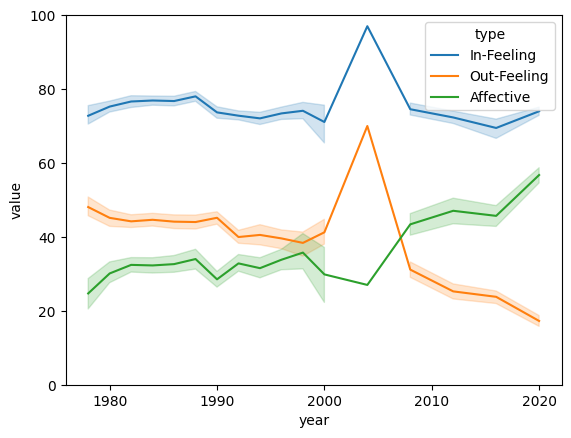

In [50]:
g = sns.lineplot(x="year", y="value", hue="type", data=pd.DataFrame(output))
g.set_ylim(0, 100)

In [51]:
from epitools import get_data

output = []

method = "nv"
for year in [2000, 2004, 2008, 2012, 2016, 2020]:
    df_tmp = get_data(
        country="United States",
        aggregation="state",
        election="first_round",
        year=year
    )
    output.append(df_tmp)

df_epi = pd.concat(output, ignore_index=True)
df_epi.head()

,state,epi,epi_between,epi_within,year
0,ALABAMA,0.954538,0.812398,0.142140,2000
1,ALASKA,0.791327,0.648163,0.143164,2000
2,ARIZONA,0.969194,0.886976,0.082218,2000
3,ARKANSAS,0.992210,0.842943,0.149267,2000
4,CALIFORNIA,0.997502,0.782541,0.214961,2000


In [31]:
df_affective_states.year.unique()

NameError: name 'df_affective_states' is not defined

In [53]:
dd = pd.merge(df_affective_states, df_epi, on=["state", "year"]).sort_values("year")
for measure in ["Affective", "In-Feeling", "Out-Feeling", "epi", "epi_between", "epi_within"]:
    dd[f"{measure}_1"] = dd.dropna(subset=["epi"]).groupby("state")[measure].shift(periods=1)
dd.corr()

C:\Users\cnava\AppData\Local\Temp\ipykernel_40932\1053030352.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dd.corr()


,year,Affective,In-Feeling,Out-Feeling,epi,epi_between,epi_within,Affective_1,In-Feeling_1,Out-Feeling_1,epi_1,epi_between_1,epi_within_1
year,1.000000,0.518501,-0.049032,-0.745856,-0.080304,-0.276559,0.233389,0.051696,-0.424423,-0.478877,-0.161031,-0.335175,0.236389
Affective,0.518501,1.000000,0.695500,-0.837290,0.036825,-0.062975,0.095297,-0.026219,-0.034421,0.002965,0.007826,-0.227702,0.253116
In-Feeling,-0.049032,0.695500,1.000000,-0.189474,0.094896,-0.019085,0.092927,-0.048247,0.200695,0.259160,0.088425,-0.210486,0.298062
Out-Feeling,-0.745856,-0.837290,-0.189474,1.000000,0.021889,0.071535,-0.059514,-0.002215,0.241819,0.235403,0.069272,0.174035,-0.134061
epi,-0.080304,0.036825,0.094896,0.021889,1.000000,0.442372,0.293300,-0.031140,0.092178,0.131375,0.765832,0.322382,0.254855
epi_between,-0.276559,-0.062975,-0.019085,0.071535,0.442372,1.000000,-0.727642,-0.083067,-0.038788,0.076909,0.268667,0.809375,-0.665694
epi_within,0.233389,0.095297,0.092927,-0.059514,0.293300,-0.727642,1.000000,0.064229,0.106843,0.014377,0.271230,-0.612164,0.877964
Affective_1,0.051696,-0.026219,-0.048247,-0.002215,-0.031140,-0.083067,0.064229,1.000000,0.686216,-0.715181,0.002370,-0.012548,0.015478
In-Feeling_1,-0.424423,-0.034421,0.200695,0.241819,0.092178,-0.038788,0.106843,0.686216,1.000000,0.017638,0.044298,-0.007531,0.043132
Out-Feeling_1,-0.478877,0.002965,0.259160,0.235403,0.131375,0.076909,0.014377,-0.715181,0.017638,1.000000,0.039307,0.010011,0.020169


In [76]:
output = []
# Republican: 1, Democrat: 5
for year, tmp in df[df["VCF0004"] > 2000].groupby("VCF0004"):
    dem = tmp[(tmp["VCF9241"].isin(list(range(0, 11)))) & (tmp["VCF0302"] == 1)] # 1: Republican
    rep = tmp[(tmp["VCF9242"].isin(list(range(1, 11)))) & (tmp["VCF0302"] == 5)]

    value_dem = np.average(dem["VCF9241"], weights=dem["VCF0009z"])
    value_rep = np.average(rep["VCF9242"], weights=rep["VCF0009z"])

    output.append({
        "value": value_dem,
        "candidate": "Democratic Party",
        "year": year
    })

    output.append({
        "value": value_rep,
        "candidate": "Republicans",
        "year": year
    })

data = pd.DataFrame(output)

ZeroDivisionError: Weights sum to zero, can't be normalized

In [81]:
df[["VCF0824", "VCF9240", "VCF9241", "VCF9242"]] = df[["VCF0824", "VCF9240", "VCF9241", "VCF9242"]].fillna(-9).replace(" ", "-9").astype(int)

In [82]:
df.VCF0824.unique()

array([-9,  0,  5,  8,  1,  7,  3,  9])

In [96]:
output = []
output_app = []
# Republican: 1, Democrat: 5

for ii, tmp in df.groupby(["VCF0004", "VCF0901a"]):

    year, fips = ii
    # dem = tmp[(tmp["VCF9241"].isin(list(range(0, 11)))) & (tmp["VCF0302"] == 1)]
    # rep = tmp[(tmp["VCF9242"].isin(list(range(1, 11)))) & (tmp["VCF0302"] == 5)]

    rep = tmp[(tmp["VCF9240"].isin(list(range(0, 11)))) & (tmp["VCF0302"] == 1)] # 1: Republican
    dem = tmp[(tmp["VCF9240"].isin(list(range(0, 11)))) & (tmp["VCF0302"] == 5)] # 5: Democrat

    rep = tmp[(tmp["VCF9240"].isin(list(range(0, 11)))) & (tmp["POL_ORIENTATION"] == "RIGHT")] # 1: Republican
    dem = tmp[(tmp["VCF9240"].isin(list(range(0, 11)))) & (tmp["POL_ORIENTATION"] == "LEFT")] # 5: Democrat

    # dem = tmp[(tmp["VCF9240"].isin(list(range(1, 11)))) & (tmp["VCF0824"] == 1)] # Liberal
    # rep = tmp[(tmp["VCF9240"].isin(list(range(1, 11)))) & (tmp["VCF0824"] == 5)] # Conservative

    try:
        # value_dem = np.average(dem["VCF9241"], weights=dem['VCF0009z'])
        # value_rep = np.average(rep["VCF9242"], weights=rep['VCF0009z'])

        value_dem = np.average(dem["VCF9240"], weights=dem['VCF0009z'])
        value_rep = np.average(rep["VCF9240"], weights=rep['VCF0009z'])

        output.append({
            "value": value_dem,
            "candidate": "Democratic Party",
            "year": year, 
            "fips": fips,
            "N": dem.shape[0]
        })

        output.append({
            "value": value_rep,
            "candidate": "Republican Party",
            "year": year,
            "fips": fips,
            "N": rep.shape[0]
        })

        output_app.append({
            "political": np.absolute(value_rep - value_dem),
            "year": year,
            "fips": fips,
            "N": min(dem.shape[0], rep.shape[0])
        })
    except:
        pass

data = pd.DataFrame(output_app)

data = pd.merge(data, df_location[["state", "fips"]], on="fips")
data["state"] = data["state"].str.upper()
data = data[data["N"] >= 10]

print(data.shape, data.year.unique(), data.state.unique())
data.to_csv("data_output/United States/Political_Polarization_ANES.csv", index=False)
data.head()

(123, 5) [2012 2020 1996 2008 2016 2004] ['ALABAMA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'CONNECTICUT'
 'FLORIDA' 'GEORGIA' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'LOUISIANA'
 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA' 'MISSOURI' 'NEBRASKA'
 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK'
 'NORTH CAROLINA' 'OHIO' 'OREGON' 'PENNSYLVANIA' 'TENNESSEE' 'TEXAS'
 'UTAH' 'VIRGINIA' 'WASHINGTON' 'WISCONSIN' 'OKLAHOMA' 'SOUTH CAROLINA'
 'IDAHO' 'KENTUCKY' 'MAINE' 'WEST VIRGINIA' 'HAWAII']


,political,year,fips,N,state
3,5.777291,2012,1,13,ALABAMA
5,6.999124,2020,1,19,ALABAMA
6,3.918351,1996,4,10,ARIZONA
7,4.950007,2008,4,12,ARIZONA
8,4.614009,2012,4,17,ARIZONA


<AxesSubplot: xlabel='year', ylabel='value'>

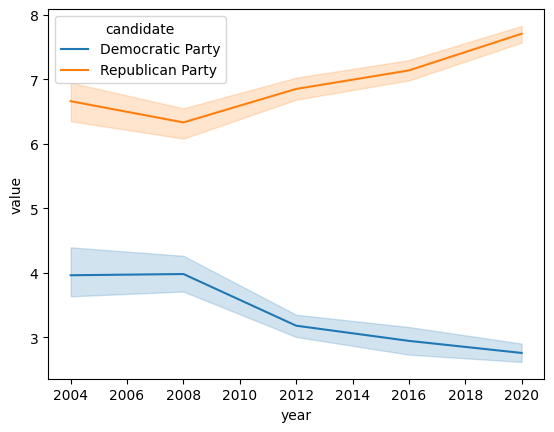

In [ ]:
sns.lineplot(x="year", y="value", hue="candidate", data=data)